In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.stem import PorterStemmer #normalize word form
from nltk.probability import FreqDist #frequency word count
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords #stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.probability import FreqDist 
import matplotlib.pyplot as plt
%matplotlib inline
import string
import re
from sklearn.model_selection import train_test_split
import nltk

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/fasttext-wikinews/wiki-news-300d-1M.vec
/kaggle/input/glove6b50dtxt/glove.6B.50d.txt
/kaggle/input/fasttext-crawl-300d-2m/crawl-300d-2M.vec
/kaggle/input/glove840b300dtxt/glove.840B.300d.txt
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin.gz


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
sample_submission = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
train = pd.read_csv("../input/nlp-getting-started/train.csv")
test = pd.read_csv("../input/nlp-getting-started/test.csv")

In [4]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# The functions used for text preprosessing

In [5]:
def text_cleaning_hyperlink(text,rep):
    
    #remove hyper link
    return re.sub(r"http\S+","{}".format(rep),text) #remove hyperlink

In [6]:
#words not in Glove
def MH_370(text):
    
    #remove hyper link
    return re.sub(r"MH370".lower(), "aircraft accident",text.lower())

In [7]:
# text_cleaning_hyperlink("https://t.co/qew4c5M1xd http://t.co/KSAwlYuX02","haha")

In [8]:
# REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
# REPLACE_BY_SPACE_RE.sub(' ', text)

In [9]:
# remove traditional punctuation
import string
def text_cleaning_punctuation(text):
    
    translator =  str.maketrans(string.punctuation, ' '*len(string.punctuation)) #remove punctuation, avoid words stick together
    
    
    return text.translate(translator)

In [10]:
#you could add puncts you don't want into puncts

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '\&','•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', 'Ò','Ò','û','ò','-','ª','Û','å','Ê','Ï','ó','÷','\x89','\x9d','ê'] 
def remove_puncts(x):

    x = str(x)
    for punct in puncts:
        x = x.replace(punct, '')#remove special characters
    return x

#ref: https://www.kaggle.com/gmhost/gru-capsule

In [11]:
remove_puncts('\x89ÛÒ')

''

In [12]:
# clean stopwords

def text_cleaning_stopwords(text):
    
    STOPWORDS = set(nltk.corpus.stopwords.words('english')) 
    STOPWORDS = STOPWORDS.union(['\x89û_', 'û_', '-', '\&','\x89û','û','\x89Û','\x89ÛÓ','\x89ÛÒ','ÛÒ','Û','åÊ','\x89û','\x89ûò'])
    
    stop_words = set(stopwords.words('english'))
    
    word_token = word_tokenize(text)
    
    filtered_sentence = [w for w in word_token if not w in stop_words]
    
    return ' '.join(filtered_sentence) #return string of no stopwords


In [13]:
# convert all letters into lowercase ones

def text_cleaning_lowercase(text):
    
    return text.lower()

In [14]:
def text_extract(text_lst):
    txt = []
    for i,x in enumerate(text_lst):
        
        for j,p in enumerate(x):
            
            txt.append(p)
    
    return txt
    

In [15]:
# remove digits from the text

def remove_digits(txt):
    
    no_digits = ''.join(i for i in txt if not i.isdigit())
    
    return no_digits

In [16]:
from nltk import pos_tag, word_tokenize
wnl = WordNetLemmatizer()


def word_lemmatizer_1(sentence):
    
    n_sentence = []
    
    for word, tag in pos_tag(word_tokenize(sentence)):
    
        wntag = tag[0].lower()
    
        if wntag in ['a', 'r', 'n', 'v']:
        
            wntag = wntag
        else:
        
            wntag = None
        
        if not wntag:
            
            lemma = wnl.lemmatize(word)
        
        else:
            
            lemma = wnl.lemmatize(word,wntag)
        
        n_sentence.append(lemma)
        
    
    n_s = ' '.join(n_sentence)
    
    return n_s


In [17]:
from nltk import pos_tag, word_tokenize
wnl = WordNetLemmatizer()


def word_lemmatizer_2(sentence):
    
    n_sentence = []
    
    for word, tag in pos_tag(word_tokenize(sentence)):
    
        wntag = tag[0].lower()
    
        if wntag in ['a', 'r', 'n']:
        
            wntag = wntag
        else:
        
            wntag = None
        
        if not wntag:
            
            lemma = wnl.lemmatize(word)
        
        else:
            
            lemma = wnl.lemmatize(word,wntag)
        
        n_sentence.append(lemma)
        
    
    n_s = ' '.join(n_sentence)
    
    return n_s

In [18]:
def mh_glove(sentence):
    
    sentence.contains("MH370".lower())
train[train.text.str.contains("(?P<url>https?://[^\s]+)")].target.value_counts()

/opt/conda/lib/python3.6/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1    2172
0    1799
Name: target, dtype: int64

In [19]:
"mh370 kjkd" in ("MH370".lower())

False

In [20]:
def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

#ref:https://www.kaggle.com/christofhenkel/how-to-preprocessing-when-using-embeddings

In [21]:
def load_embed(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    if file == '../input/fasttext-wikinews/wiki-news-300d-1M.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o)>100)
    else:
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
        
    return embeddings_index

In [22]:
# from gensim.models import KeyedVectors
# #check the intersection google embeding 
# news_path = "../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin"
# embeddings_index_google = KeyedVectors.load_word2vec_format(news_path, binary=True)

In [23]:
import operator 

def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

# Loadding Glove and check the coverage without text cleanning 

In [24]:
glove = '../input/glove840b300dtxt/glove.840B.300d.txt'
# wiki_news = '../input/fasttext-wikinews/wiki-news-300d-1M.vec'

In [25]:
embedding_index_glove = load_embed(glove) #loading glove


In [26]:
# embedding_index_fasttext = load_embed(wiki_news) #loading fasttext

In [27]:
#vocabulary without cleaning process
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
sentences = train["text"].apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
print({k: vocab[k] for k in list(vocab)[:5]})

100%|██████████| 7613/7613 [00:00<00:00, 154108.28it/s]

{'Our': 25, 'Deeds': 1, 'are': 345, 'the': 2575, 'Reason': 5}


In [28]:
oov_glove = check_coverage(vocab,embedding_index_glove)#coverage without cleanning

100%|██████████| 31924/31924 [00:00<00:00, 585033.52it/s]

Found embeddings for 52.06% of vocab
Found embeddings for  82.68% of all text


In [29]:
oov_glove

[('\x89Û_', 50),
 ('MH370:', 39),
 ('\x89ÛÒ', 38),
 ('Latest:', 31),
 ("Legionnaires'", 31),
 ('#prebreak', 30),
 ("he's", 28),
 ('re\x89Û_', 27),
 ('w/', 26),
 ("there's", 26),
 ("'The", 26),
 ('\x89ÛÓ', 26),
 ('Legionnaires:', 25),
 ('a...', 24),
 ('PM:', 24),
 ("Confirmed'", 23),
 ("'Conclusively", 23),
 ('Typhoon-Devastated', 23),
 ('#???', 23),
 ('Saipan:', 22),
 ('.:', 21),
 ('were...', 20),
 ('(Detonation)', 20),
 ('MH370', 20),
 ('VIDEO:', 20),
 ('#Hiroshima', 20),
 ('#??', 20),
 ('disea...', 19),
 ('Photo:', 19),
 ('bestnaijamade', 18),
 ("'We're", 18),
 ("Reddit's", 18),
 ('Soudelor', 18),
 ('news!', 17),
 ('2015]', 17),
 ('[Black', 17),
 ('Funtenna:', 17),
 ("That's", 17),
 ("won't", 17),
 ("they're", 17),
 ("'I", 17),
 ("What's", 17),
 ('Crash:', 16),
 ("water':", 16),
 ("neighbour's", 16),
 ('Unconfirmed!', 16),
 ('#GBBO', 16),
 ('fires.', 16),
 ("she's", 16),
 ("China's", 15),
 ('quiz:', 15),
 ("ain't", 15),
 ("Can't", 15),
 ('MP:', 14),
 ("wasn't", 14),
 ("crematoria'", 

#  Data Expolary Real Disaster or Not Real Disaster

In [30]:
round(train.target.value_counts(normalize=True),2)

0    0.57
1    0.43
Name: target, dtype: float64

Visualization about the distribution of Real or Fake twitter

# Explore the length or the count of words

In [31]:
train['text_len'] = train['text'].astype(str).apply(len)
train['text_word_count'] = train['text'].apply(lambda x: len(str(x).split()))

In [32]:
train[train.target == 1]['text_len'].describe()

count    3271.000000
mean      108.113421
std        29.309854
min        14.000000
25%        88.000000
50%       115.000000
75%       136.000000
max       151.000000
Name: text_len, dtype: float64

In [33]:
train[train.target == 0]['text_len'].describe()

count    4342.000000
mean       95.706817
std        35.885924
min         7.000000
25%        68.000000
50%       101.000000
75%       130.000000
max       157.000000
Name: text_len, dtype: float64

In [34]:
train[train.target == 1]['text_word_count'].describe()

count    3271.000000
mean       15.167533
std         5.096806
min         2.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        30.000000
Name: text_word_count, dtype: float64

In [35]:
train[train.target == 0]['text_word_count'].describe()

count    4342.000000
mean       14.704744
std         6.161564
min         1.000000
25%        10.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: text_word_count, dtype: float64

In [36]:
#source of code : https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
STOPWORDS = set(nltk.corpus.stopwords.words('english'))
STOPWORDS = STOPWORDS.union(['\x89û_', 'û_', '-', '\&'])
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [37]:
real_unigrams = get_top_n_words(train[train.target == 1]['text'],20)
fake_unigrams = get_top_n_words(train[train.target == 0]['text'],20)


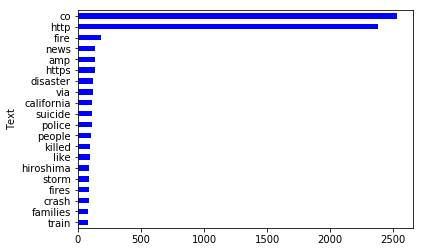

In [38]:

df1 = pd.DataFrame(real_unigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).plot(kind='barh',color='blue')

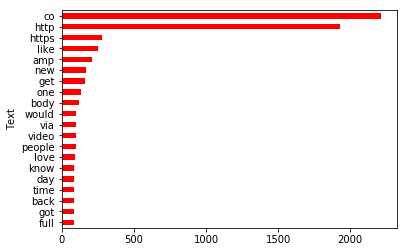

In [39]:
df2 = pd.DataFrame(fake_unigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).plot(kind='barh',color='red')

In [40]:
STOPWORDS = set(nltk.corpus.stopwords.words('english'))
STOPWORDS = STOPWORDS.union(['\x89û_', 'û_', '-', '\&'])

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [41]:
real_bigrams = get_top_n_gram(train[train.target == 1]['text'],(2,2),20)
fake_bigrams = get_top_n_gram(train[train.target == 0]['text'],(2,2),20)

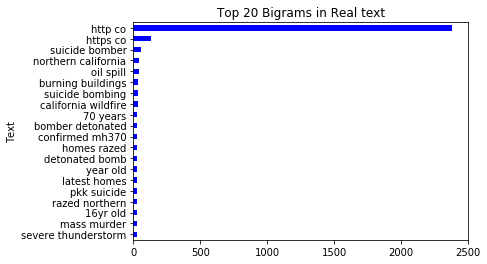

In [42]:
df3 = pd.DataFrame(real_bigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='blue', title='Top 20 Bigrams in Real text')

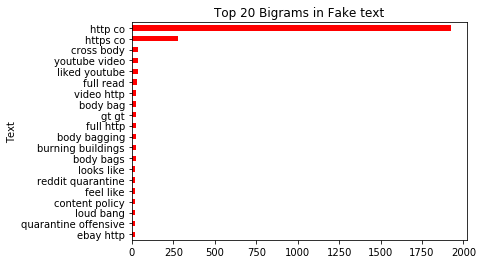

In [43]:
df4 = pd.DataFrame(fake_bigrams, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='red',title='Top 20 Bigrams in Fake text')

In [44]:
df4.groupby('Text').sum()['count'].sort_values(ascending=False)

Text
http co                 1924
https co                 276
cross body                39
youtube video             36
liked youtube             35
full read                 28
video http                27
body bag                  27
gt gt                     26
full http                 25
body bagging              24
burning buildings         23
body bags                 22
looks like                21
reddit quarantine         21
feel like                 20
content policy            20
loud bang                 19
quarantine offensive      19
ebay http                 19
Name: count, dtype: int64

In [45]:
train['text_list'] = train['text'].apply(lambda x: str(x).split())


In [46]:
idx = [r"http\S+" in row for i,row in train['text_list'].iteritems()]

In [47]:
# myString = "This is my tweet check it out https://example.com/blah"
train['url'] = train.text.str.extract("(?P<url>https?://[^\s]+)")

# print(re.search("(?P<url>https?://[^\s]+)", myString).group("url"))

In [48]:
train['url'].value_counts()

http://t.co/qew4c5M1xd    9
http://t.co/q2eBlOKeVE    6
http://t.co/KSAwlYuX02    6
http://t.co/cybKsXHF7d    5
http://t.co/vVPLFQv58P    5
                         ..
http://t.co/9Vw0uQQi1y    1
http://t.co/cykr4XAlUH    1
http://t.co/3LN8TrHw6X    1
http://t.co/aqinaVl1b6    1
http://t.co/LJMGdpDLvs    1
Name: url, Length: 3875, dtype: int64

In [49]:
train[train.text.str.contains("(?P<url>https?://[^\s]+)")].target.value_counts()

/opt/conda/lib/python3.6/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1    2172
0    1799
Name: target, dtype: int64

In [50]:
train[train.text.str.contains("(?P<url>https?://[^\s]+)")][train.target ==0].url

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


32       http://t.co/YAo1e0xngw
35       http://t.co/qqsmshaJ3N
40       http://t.co/rOI2NSmEJJ
44       http://t.co/o9qknbfOFX
45       http://t.co/TIyUliF5c6
                 ...           
7576     http://t.co/y46isyZkC8
7580     http://t.co/7enNulLKzM
7581     http://t.co/oMNBAtJEAO
7582     http://t.co/N6RBnHMTD4
7584    https://t.co/TFGrAyuDC5
Name: url, Length: 1799, dtype: object

In [51]:
train[train.text.str.contains("(?P<url>https?://[^\s]+)")][train.target ==1].url

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


31      http://t.co/lHYXEOHY6C
33      http://t.co/2nndBGwyEi
37      http://t.co/3ImaomknnA
38      http://t.co/wDUEaj8Q4J
46      http://t.co/vl5TBR3wbr
                 ...          
7606    http://t.co/nF4IculOje
7607    http://t.co/3SICroAaNz
7608    http://t.co/STfMbbZFB5
7610    http://t.co/zDtoyd8EbJ
7612    http://t.co/YmY4rSkQ3d
Name: url, Length: 2172, dtype: object

In [52]:
reg = re.compile('https?\S+(?=\s|$)')
dataf['clean_text'] = dataf.apply(lambda r: re.sub(reg, string=r['clean_text'], repl=''), axis=1)

NameError: name 'dataf' is not defined

In [53]:
# import requests

# response = requests.get('http://chollo.to/675za')
# for resp in response.history:
#     print(resp.status_code, resp.url)
# print(response.url)
# print(response.is_redirect)

In [54]:
real_trigrams = get_top_n_gram(train[train.target == 1]['text'],(3,3),20)
fake_trigrams = get_top_n_gram(train[train.target == 0]['text'],(3,3),20)

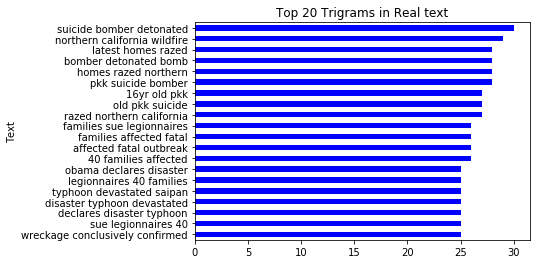

In [55]:
df5 = pd.DataFrame(real_trigrams, columns = ['Text' , 'count'])
df5.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='blue', title='Top 20 Trigrams in Real text')

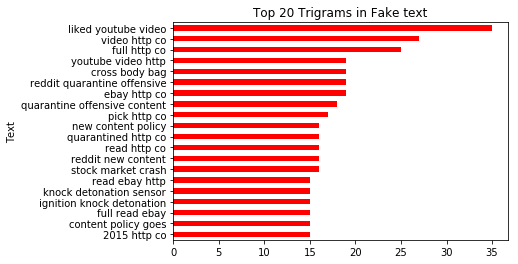

In [56]:
df6 = pd.DataFrame(fake_trigrams, columns = ['Text' , 'count'])
df6.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='red', title='Top 20 Trigrams in Fake text')

In [57]:
#Clean the text

In [58]:
"mh370" in embedding_index_glove

False

In [59]:
#clean the keyword for train keyword
train.keyword = train.keyword.apply(lambda x: text_cleaning_stopwords(text_cleaning_punctuation(text_cleaning_hyperlink(remove_digits(x.lower()),''))) if type(x) == str else ' ')
train.keyword = train.keyword.apply(lambda x: list(x.split(' ')))
train.keyword = train.keyword.apply(lambda x: ' '.join(x))

In [60]:
 #replace the hyperlink to keyword if keyword is exist
train['text_clean'] = train.apply(lambda x: text_cleaning_hyperlink(x['text'],x['keyword']) if x['keyword'] != ' ' else text_cleaning_hyperlink(x['text'],''),axis=1 )

In [61]:
train['text_clean'] = train['text_clean'].apply(lambda x: text_cleaning_stopwords(text_cleaning_punctuation(x)))#some of the number didn't remove after several steps
train['text_clean'] = train['text_clean'].apply(lambda x: list((x.split(' '))))
train['text_clean'] = train['text_clean'].apply(lambda x: ' '.join(x))

In [62]:
train['text_clean'] = train['text_clean'].apply(lambda x: remove_digits(MH_370(x.lower())))#mh370 added
train['text_clean'] = train['text_clean'].apply(lambda x: list((x.split(' '))))
train['text_clean'] = train['text_clean'].apply(lambda x: ' '.join(x))

In [63]:
train['text_clean'] =train['text_clean'].apply(lambda x: remove_puncts(x))#special puncts we don't want in puncts dictionary
train['text_clean'] = train['text_clean'].apply(lambda x: list((x.split(' '))))
train['text_clean'] = train['text_clean'].apply(lambda x: ' '.join(x))

In [64]:
train['text_clean']

0        our deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       all residents asked shelter place notified off...
3         people receive wildfires evacuation orders c...
4       just got sent photo ruby alaska smoke wildfire...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria ahrary thetawniest the control wild fires...
7610                         m    utc km s volcano hawaii
7611    police investigating e bike collided car littl...
7612    the latest more homes razed northern californi...
Name: text_clean, Length: 7613, dtype: object

# Embedding Coverage after Cleanning

In [65]:
sentences_clean = train['text_clean'].apply(lambda x: x.split())
vocab_clean = build_vocab(sentences_clean)

100%|██████████| 7613/7613 [00:00<00:00, 225850.79it/s]


In [66]:
oov_text_clean_glove = check_coverage(vocab_clean,embedding_index_glove) #better performance using our cleanning #after applying cleanning without lemmatizer

100%|██████████| 16297/16297 [00:00<00:00, 615923.48it/s]

Found embeddings for 78.13% of vocab
Found embeddings for  94.71% of all text


In [67]:
#The words not in the glove dictionary
oov_text_clean_glove

[('prebreak', 30),
 ('soudelor', 26),
 ('bestnaijamade', 24),
 ('gbbo', 21),
 ('funtenna', 17),
 ('bayelsa', 16),
 ('marians', 14),
 ('udhampur', 13),
 ('arianagrande', 11),
 ('abstorm', 9),
 ('trfc', 9),
 ('irandeal', 9),
 ('mediterran', 8),
 ('beyhive', 8),
 ('animalrescue', 7),
 ('linkury', 7),
 ('okwx', 7),
 ('rìunion', 7),
 ('mhtwfnet', 7),
 ('mtvhottest', 7),
 ('trapmusic', 7),
 ('djicemoon', 7),
 ('icemoon', 7),
 ('sinjar', 6),
 ('prophetmuhammad', 6),
 ('tubestrike', 6),
 ('mikeparractor', 6),
 ('rohingya', 6),
 ('dorret', 6),
 ('kisii', 6),
 ('kerricktrial', 5),
 ('twia', 5),
 ('naved', 5),
 ('nasahurricane', 5),
 ('yobe', 5),
 ('pantherattack', 5),
 ('youngheroesid', 5),
 ('socialnews', 5),
 ('strategicpatience', 5),
 ('sittwe', 5),
 ('summerfate', 5),
 ('mansehra', 5),
 ('usagov', 5),
 ('viralspell', 5),
 ('idfire', 4),
 ('karymsky', 4),
 ('rexyy', 4),
 ('japì', 4),
 ('detectado', 4),
 ('wisenews', 4),
 ('lulgzimbestpicts', 4),
 ('ramag', 4),
 ('diamondkesawn', 4),
 ('raynbo

# model train on Trainning data 

In [68]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(train['text_clean'],train.target, test_size=0.3)

In [69]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
## Tokenize the sentences
max_features = 10000
maxlen = max([len(i) for i in sentences_clean])
embed_size = 300

tokenizer = Tokenizer(num_words=max_features, filters='')
tokenizer.fit_on_texts(list(X_train_1))

X_train_token = tokenizer.texts_to_sequences(X_train_1)
X_test_token = tokenizer.texts_to_sequences(X_test_1)

## Pad the sentences 
X_train_sequence = pad_sequences(X_train_token, maxlen=maxlen)
X_test_sequence = pad_sequences(X_test_token, maxlen=maxlen)

Using TensorFlow backend.


In [70]:
word_index = tokenizer.word_index
max_features = len(word_index)+1

def load_embedding(word_index,embeddings_index):
#     EMBEDDING_FILE = '../input/glove840b300dtxt/glove.840B.300d.txt''
#     def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
#     embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if o.split(" ")[0] in word_index)

    all_embs = np.stack(embeddings_index.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]

    embedding_matrix = np.random.normal(emb_mean, emb_std, (max_features, embed_size))
    for word, i in word_index.items():
        if i >= max_features: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: embedding_matrix[i] = embedding_vector
            
    return embedding_matrix 

# ref: https://www.kaggle.com/gmhost/gru-capsule

In [71]:
embedding_matrix_glove = load_embedding(word_index,embedding_index_glove) #embedding the words with glove

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [72]:
# embedding_matrix_google = load_embedding(word_index,embeddings_index_google)

In [73]:
# embedding_matrix_google = load_glove(word_index,embeddings_index_google)

In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding,SpatialDropout1D,Dropout
 
model_2 = Sequential()
model_2.add(Embedding(max_features,
                    embed_size,  # Embedding size
                    weights=[embedding_matrix_glove],
                    input_length=maxlen,
                    trainable=False))
# model_2.add(Dropout(0.25))
model_2.add(LSTM(300))
model_2.add(Dense(units=300, activation='sigmoid'))#nodes matter
# model_2.add(Dropout(0.5))
model_2.add(Dense(units=200, activation='sigmoid'))#nodes matter
model_2.add(Dense(units=100, activation='sigmoid'))#nodes matter
model_2.add(Dense(units=1, activation='sigmoid'))
 
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())
 
model_2.fit(X_train_sequence, y_train_1, epochs=5, validation_split=0.3,batch_size=200, verbose=1)#batch size matter
 
scores = model_2.evaluate(X_test_sequence, y_test_1, verbose=1)
print("Accuracy:", scores[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 300)           3912900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 4,804,801
Trainable params: 891,901
Non-trainable params: 3,912,900
______________________________________

# **Cleanning the Test Words******

In [75]:
#Step 1 clean the test words
#clean the keyword for test keyword
test.keyword = test.keyword.apply(lambda x: text_cleaning_stopwords(text_cleaning_punctuation(text_cleaning_hyperlink(remove_digits(x.lower()),''))) if type(x) == str else ' ')
test.keyword = test.keyword.apply(lambda x: list(x.split(' ')))
test.keyword = test.keyword.apply(lambda x: ' '.join(x))

In [76]:
#Step 2. replace the hyperlink to the keyword if keyword is exist
test['text_clean'] = test.apply(lambda x: text_cleaning_hyperlink(x['text'],x['keyword']) if x['keyword'] != ' ' else text_cleaning_hyperlink(x['text'],''),axis=1 )

In [77]:
#Step 3. Cleanning  majority
#some of the number didn't remove after several steps
test['text_clean'] = test['text_clean'].apply(lambda x: text_cleaning_stopwords(text_cleaning_punctuation(x)))#some of the number didn't remove after several steps
test['text_clean'] = test['text_clean'].apply(lambda x: list((x.split(' '))))
test['text_clean'] = test['text_clean'].apply(lambda x: ' '.join(x))

In [78]:
#Step 4 
test['text_clean'] = test['text_clean'].apply(lambda x: remove_digits(MH_370(x.lower())))#mh370 added
test['text_clean'] = test['text_clean'].apply(lambda x: list((x.split(' '))))
test['text_clean'] = test['text_clean'].apply(lambda x: ' '.join(x))

In [79]:
#Step 5. Cleanning special character
#special puncts we don't want in puncts dictionary
test['text_clean'] =test['text_clean'].apply(lambda x: remove_puncts(x))
test['text_clean'] = test['text_clean'].apply(lambda x: list((x.split(' '))))
test['text_clean'] = test['text_clean'].apply(lambda x: ' '.join(x))

In [80]:
# Model predict

In [81]:

X_test_test_token = tokenizer.texts_to_sequences(test['text_clean'])

## Pad the sentences 
X_test_tes_sequence = pad_sequences(X_test_test_token, maxlen=maxlen)

In [82]:
y_predicted = model_2.predict_classes(X_test_tes_sequence)


In [83]:
y_predicted

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [84]:
y_predicted

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [85]:
sample_submission["target"] = y_predicted

In [86]:
sample_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [87]:
sample_submission["target"].value_counts()

0    1918
1    1345
Name: target, dtype: int64

In [88]:
sample_submission.to_csv("submission.csv", index = False)

In [89]:
# # prepare to map words to vectors

# def average_w2v(list_of_tokens, vct, generate_missing = False, dimentions = 300):
#     if len(list_of_tokens) < 1:
#         return np.zeros(dimentions)
#     if generate_missing:
#         vector = [vct[item] if item in vct else np.random.rand(dimentions) for item in list_of_tokens]
#     else:
#         vector = [vct[item] if item in vct else np.zeros(dimentions) for item in list_of_tokens]
#     total_length = len(vector)
#     sum_of_vectors = np.sum(vector, axis=0)
#     average = np.divide(sum_of_vectors, total_length)
#     return average

In [90]:
# # map words to vectors (using the googlenewsvectorsnegative300 database)

# def word2vec_mapping(vect, our_word, generate_missing = False):
#     mapping = our_word.apply(lambda x: average_w2v(x, vect, generate_missing = generate_missing))
#     return list(mapping)

In [91]:
# mapped_train = word2vec_mapping(embeddings_index, X_train_1) # vectorize the TRAINING set
# mapped_test = word2vec_mapping(embeddings_index,y_test_1)    # vectorize the TEST set

In [92]:
# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(list(train_X))
# train_X = tokenizer.texts_to_sequences(train_X)
# test_X = tokenizer.texts_to_sequences(test_X)

#     ## Pad the sentences 
#     train_X = pad_sequences(train_X, maxlen=maxlen)
#     test_X = pad_sequences(test_X, maxlen=maxlen)

In [93]:
# we clean the keywords for the TRAINING data

#train.keyword = train.keyword.apply(lambda x: text_cleaning_stopwords(text_cleaning_punctuation(text_cleaning_hyperlink(remove_digits(x.lower())))) if type(x) == str else x)

In [94]:
# for word, tag in pos_tag(word_tokenize(sent)):
# ...     wntag = tag[0].lower()
# ...     wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
# ...     if not wntag:
# ...             lemma = word
# ...     else:
# ...             lemma = wnl.lemmatize(word, wntag)
# ...     print lemma

In [95]:
# pos_tag(word_tokenize('evacuation happening building across street emergency'))

In [96]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding
 
# model = Sequential()
# model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
#                     64,  # Embedding size
#                     input_length=MAX_SEQ_LENGHT))
# model.add(Conv1D(64, 5, activation='relu'))
# model.add(MaxPooling1D(5))
# model.add(Flatten())
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
 
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

In [97]:
# model.fit(X_train_sequences[:-100], y_train_1[:-100], 
#           epochs=3, batch_size=128, verbose=1,
#           validation_data=(X_train_sequences[-100:], y_train_1[-100:]))

In [98]:
# scores = model.evaluate(X_test_sequences, y_test_1, verbose=1)
# print("Accuracy:", scores[1])

In [99]:
# import spacy
# import numpy as np
# nlp = spacy.load('en_core_web_md')
 
# EMBEDDINGS_LEN = len(nlp.vocab['apple'].vector)
# print("EMBEDDINGS_LEN=", EMBEDDINGS_LEN)  # 300
 
# embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDINGS_LEN))
# for word, idx in word2idx.items():
#     try:
#         embedding = nlp.vocab[word].vector
#         embeddings_index[idx] = embedding
#     except:
#         pass

In [100]:

# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Embedding
 
# model_4 = Sequential()
# model_4.add(Embedding(len(vectorizer.get_feature_names()) + 1,
#                     EMBEDDINGS_LEN,  # Embedding size
#                     weights=[embeddings_index],
#                     input_length=MAX_SEQ_LENGHT,
#                     trainable=False))
# model_4.add(LSTM(300))
# model_4.add(Dense(units=1, activation='sigmoid'))
 
# model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model_4.summary())
 